In [5]:
import torch
import numpy as np
import pandas as pd
import pygmo

import matplotlib.pyplot as plt
import seaborn as sns

from transvae.snc import SNC 

from scipy.stats import pearsonr

from transvae import trans_models
from transvae.transformer_models import TransVAE
from transvae.tvae_util import *
from transvae.analysis import make_model_name, get_boloop_runs


import os
import pickle as pkl

In [6]:
from pygmo import hypervolume
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [7]:
SAVE_FIGURES=False

In [8]:
# def make_model_name(_prop, model_number, semi_sup_percent):
    
#     if   _prop == "bch":
#         prop="bch"
#     elif _prop == "bc":
#         prop="boman-chargepH7p2"
#     elif _prop == "b":
#         prop="boman"
#     elif _prop == "c":
#         prop="chargepH7p2"
#     elif _prop == "h":
#         prop="hydrophobicity"
    
#     if (semi_sup_percent==100 or semi_sup_percent=="100"):
#         percent = ""
#         suffix="dPP64-ZScore"
#     elif (semi_sup_percent==0 or semi_sup_percent=="0"):
#         percent = ""
#         suffix="cdhit90-zScoreNormalized"
#     else:
#         percent = str(semi_sup_percent)+"-"
#         suffix="cdhit90-zScoreNormalized"

#     model_name=f"transvae-64-peptides-{prop}-zScoreNormalized-{percent}organized-{suffix}"

#     return model_name

In [9]:
# def get_boloop_runs(model_name, perc, dim_reduction_method, box_bounds):

#     if perc==0 or perc=="0":
#         _fname = f"boloop_results_{dim_reduction_method}_neg{box_bounds}to{box_bounds}_{model_name}_log10_mic.pkl"
#         with open(f"analysis/{model_name}/boloop_results/{_fname}", 'rb') as f:
#             data=pkl.load(f)
        
#         runs = [data[f'run_{j}'] for j in range(5)]
#     else:
#         # check if boloop_results file exists first
#         _fname = f"boloop_results_{dim_reduction_method}_neg{box_bounds}to{box_bounds}_{model_name}_log10_mic.pkl"
#         if os.path.exists(f"analysis/{model_name}/boloop_results/{_fname}"):
#             with open(f"analysis/{model_name}/boloop_results/{_fname}", 'rb') as f:
#                 data=pkl.load(f)
            
#             runs = [data[f'run_{j}'] for j in range(5)]        
#         else:
#             runs = []
#             for i in range(5):
#                 _fname = f"optimization_results_{dim_reduction_method}_neg{box_bounds}to{box_bounds}_{model_name}_run{i}.pkl"
#                 _fpath = f"analysis/{model_name}/boloop_results/{_fname}"
#                 if os.path.exists(_fpath):
#                     with open(_fpath, "rb") as f:
#                         _run=pkl.load(f)
#                 elif dim_reduction_method=="PCA":
#                     _fname = f"optimization_results_{model_name}_run{i}.pkl"
#                     print(f"trying filename: {_fname}")
#                     _fpath = f"analysis/{model_name}/boloop_results/{_fname}"
#                     with open(_fpath, "rb") as f:
#                         _run=pkl.load(f)
                        
#                 runs.append( _run )
    
#     return runs

In [10]:
# def make_model_name(_prop, model_number, semi_sup_percent):
    
#     if   _prop == "bch":
#         prop="bch"
#     elif _prop in ["bc", "boman-chargepH7p2"]:
#         prop="boman-chargepH7p2"
#     elif _prop in ["b","boman"]:
#         prop="boman"
#     elif _prop in ["c", "chargepH7p2"]:
#         prop="chargepH7p2"
#     elif _prop in ["h", "hydrophobicity"]:
#         prop="hydrophobicity"
#     elif _prop == "predicted-log10mic":
#         prop = "predicted-log10mic"
    
#     if (semi_sup_percent==100 or semi_sup_percent=="100"):
#         percent = ""
#         suffix="dPP64-ZScore"
#     elif (semi_sup_percent==0 or semi_sup_percent=="0"):
#         if prop=="predicted-log10mic":
#             percent = "0-"
#         else:
#             percent = ""
#         suffix="cdhit90-zScoreNormalized"
#     else:
#         percent = str(semi_sup_percent)+"-"
#         suffix="cdhit90-zScoreNormalized"

#     model_name=f"transvae-64-peptides-{prop}-zScoreNormalized-{percent}organized-{suffix}"

#     return model_name

# def get_boloop_runs(model_name, perc, dim_reduction_method, box_bounds, n_pca_dims=5):

#     if box_bounds==10:
#         box_bound_info = f"_neg{box_bounds}to{box_bounds}_"
#     else:
#         box_bound_info = ""

#     if n_pca_dims==5:
#         pca_dim_info = ""
#     else:
#         pca_dim_info = f"_PCAdims{n_pca_dims}_"
    
#     if (perc==0 or perc=="0") and ("predicted-log10mic" not in model_name):
#         _fname = f"boloop_results_{dim_reduction_method}{box_bound_info}{pca_dim_info}{model_name}_log10_mic.pkl"
#         print("in first if")
#         print(f"{_fname=}")
        
#         with open(f"analysis/{model_name}/boloop_results/{_fname}", 'rb') as f:
#             data=pkl.load(f)
        
#         runs = [data[f'run_{j}'] for j in range(5)]
#     else:
#         # check if boloop_results file exists first
#         _fname = f"boloop_results_{dim_reduction_method}{box_bound_info}{pca_dim_info}{model_name}_log10_mic.pkl"
#         print(f"{_fname=}")
#         if os.path.exists(f"analysis/{model_name}/boloop_results/{_fname}"):
#             with open(f"analysis/{model_name}/boloop_results/{_fname}", 'rb') as f:
#                 data=pkl.load(f)
            
#             runs = [data[f'run_{j}'] for j in range(5)]        
#         else:
#             print("boloop results file doesn't exist?")
#             runs = []
#             for i in range(5):
#                 if "predicted-log10mic" in model_name:                    
#                     _fname = f"optimization_results_{model_name}_run{i}.pkl"
#                 else:
#                     _fname = f"optimization_results_{dim_reduction_method}{box_bound_info}{model_name}_run{i}.pkl"
#                 print(f"{_fname=}")
#                 _fpath = f"analysis/{model_name}/boloop_results/{_fname}"
#                 if os.path.exists(_fpath):
#                     with open(_fpath, "rb") as f:
#                         _run=pkl.load(f)
#                 elif dim_reduction_method=="PCA":
#                     _fname = f"optimization_results_{model_name}_run{i}.pkl"
#                     print(f"trying filename: {_fname}")
#                     _fpath = f"analysis/{model_name}/boloop_results/{_fname}"
#                     with open(_fpath, "rb") as f:
#                         _run=pkl.load(f)
                        
#                 runs.append( _run )
    
#     return runs

In [11]:
SAVE_FIGURES

False

b-98
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-98
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
h-98
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bc-98
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bch-98
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-bch-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


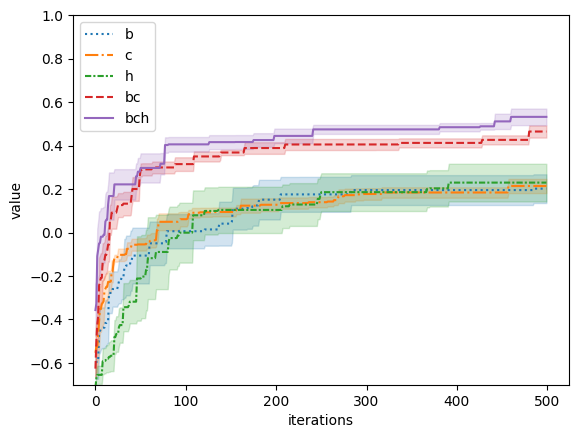

In [12]:
dim_reduction_method="PCA" # options: ['identity', 'PCA']
box_bounds=10 # options: [5,10]
end_point = 500

properties = ['b','c','h','bc','bch']
linestyles = [':', '-.', (0, (3, 1, 1, 1)),'--', '-'] 
_perc = 98
for _prop_i, prop in enumerate(properties):
    _model_name = make_model_name(prop, "100", _perc)
    
    prop_perc = f"{prop}-{_perc}"
    # results[prop_perc] = {}
    print(prop_perc)
    
    runs = get_boloop_runs(_model_name, _perc, dim_reduction_method, box_bounds)
    
    ### ================ Put into DataFrames ================
    data=pd.DataFrame()
    for i in range(5):
        _data_x = list(range(end_point))#runs[i]['iterations'][:end_point]
        _data_y = runs[i]["best_objective_values"][:end_point]
        if len(_data_y)<end_point:
            _data_y = _data_y + [np.nan]*(end_point-len(_data_y))
        if i==0:
            data['iterations']=_data_x
        data[f"run{i}"]=_data_y

    melted_data = pd.melt(data, id_vars=["iterations"], value_vars=[f"run{i}" for i in range(5)])

    sns.lineplot(data=melted_data, 
             x="iterations",
             y="value", 
             label=prop,
             errorbar='se',
             linestyle=linestyles[_prop_i],
    )
    plt.ylim([-0.7,1.0])

# plt.title(f"projection: {dim_reduction_method} | MaskPercent: {_perc}")
if SAVE_FIGURES:
    plt.savefig("figures/boloop_results_mask98_PCA.jpeg",dpi=300)

In [13]:
_model_name = make_model_name("bch", 100, "98")
_perc = "98"
runs = get_boloop_runs(_model_name, _perc, dim_reduction_method, box_bounds)

_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-bch-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


In [14]:
### ================ Put into DataFrames ================
data=pd.DataFrame()
for i in range(5):
    _data_x = list(range(end_point))#runs[i]['iterations'][:end_point]
    _data_y = runs[i]["best_objective_values"][:end_point]
    if len(_data_y)<end_point:
        _data_y = _data_y + [np.nan]*(end_point-len(_data_y))
    if i==0:
        data['iterations']=_data_x
    data[f"run{i}"]=_data_y

melted_data = pd.melt(data, id_vars=["iterations"], value_vars=[f"run{i}" for i in range(5)])


In [15]:
melted_data.loc[melted_data.value == melted_data.value.max() ].head()

,iterations,variable,value
2442,442,run4,0.646153
2443,443,run4,0.646153
2444,444,run4,0.646153
2445,445,run4,0.646153
2446,446,run4,0.646153


In [16]:
runs[4]['best_sequences'][-5:]

['MQKKKKKKKKKKLAKRAKRLALRKRKLLKARLTPRLKALLTPRMKRALNGFRGARMRARYFTPAKRQRLGFIRTNIRGQRNINHTS',
 'MQKKKKKKKKKKLAKRAKRLALRKRKLLKARLTPRLKALLTPRMKRALNGFRGARMRARYFTPAKRQRLGFIRTNIRGQRNINHTS',
 'MQKKKKKKKKKKLAKRAKRLALRKRKLLKARLTPRLKALLTPRMKRALNGFRGARMRARYFTPAKRQRLGFIRTNIRGQRNINHTS',
 'MQKKKKKKKKKKLAKRAKRLALRKRKLLKARLTPRLKALLTPRMKRALNGFRGARMRARYFTPAKRQRLGFIRTNIRGQRNINHTS',
 'MQKKKKKKKKKKLAKRAKRLALRKRKLLKARLTPRLKALLTPRMKRALNGFRGARMRARYFTPAKRQRLGFIRTNIRGQRNINHTS']

In [17]:
len("MQKKKKKKKKKKLAKRAKRLALRKRKLLKARLTPRLKALLTPRMKRALNGFRGARMRARYFTPAKRQRLGFIRTNIRGQRNINHTS")

86

# Compare identity vs PCA
Plot all percentages for a given property on the same graph.

b-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-50
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-75
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-98
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-25-organized-cdhi

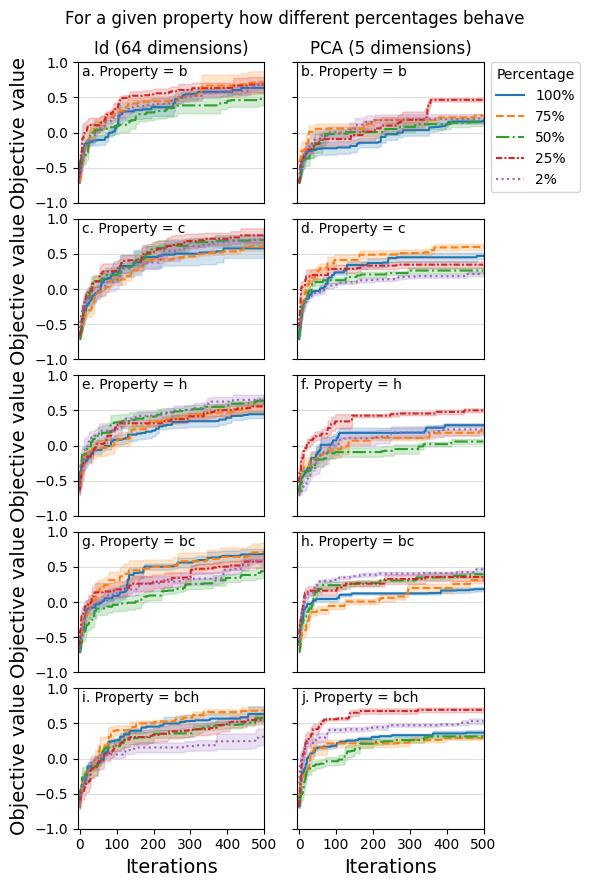

In [18]:
fig = plt.figure(figsize=(6,9))
grid= fig.add_gridspec(5,2)
fontsize = 14

dim_reduction_method="PCA" # options: ['identity', 'PCA']
box_bounds=10 # options: [5,10]
end_point = 500

linestyles = ['-', '--', '-.', (0, (3, 1, 1, 1)), ':'] 
subpanel_labels = {
    (0, 0): 'a',
    (1, 0): 'b',
    (0, 1): 'c',
    (1, 1): 'd',
    (0, 2): 'e',
    (1, 2): 'f',
    (0, 3): 'g',
    (1, 3): 'h',
    (0, 4): 'i',
    (1, 4): "j"
}
for _dim_i, dim_reduction_method in enumerate(["identity", "PCA"]):
    
    properties = ['b','c','h','bc','bch']
    _perc = 98
    for _prop_i, prop in enumerate(properties):
        ax = fig.add_subplot(grid[_prop_i, _dim_i])
        text_x, text_y = 5, 0.8
        if _prop_i==0:
            if dim_reduction_method=="identity":
                _dim_text = "Id"
            else:
                _dim_text = "PCA"
            ax.set_title(f"{_dim_text} ({_dim_i*5 + (1-_dim_i)*64} dimensions)")
            ax.text(text_x, text_y ,f"{subpanel_labels[_dim_i, _prop_i]}. Property = {prop}")
        else:
            ax.text(text_x, text_y ,f"{subpanel_labels[_dim_i, _prop_i]}. Property = {prop}")

        ax.set_ylim([-1.0,1.0])
        ax.set_xlim([-5,500])
        ax.grid(axis='y',alpha=0.4)
        for _perc_i, _perc in enumerate([0,25,50,75,98]):
            
            _model_name = make_model_name(prop, "100", _perc)
            
            prop_perc = f"{prop}-{_perc}"
            # results[prop_perc] = {}
            print(prop_perc)

            try:
                runs = get_boloop_runs(_model_name, _perc, dim_reduction_method, box_bounds)
            except UnboundLocalError as e:
                print(f"encountered unbound local error for {dim_reduction_method=}:",_model_name)
                continue
            
            ### ================ Put into DataFrames ================
            data=pd.DataFrame()
            for i in range(5):
                _data_x = list(range(end_point))#runs[i]['iterations'][:end_point]
                _data_y = runs[i]["best_objective_values"][:end_point]
                if len(_data_y)<end_point:
                    print(f"{prop_perc=} {dim_reduction_method} needs to be run to 500 iters ({len(_data_y)})" )
                    _data_y = _data_y + [np.nan]*(end_point-len(_data_y))
                if i==0:
                    data['iterations']=_data_x
                data[f"run{i}"]=_data_y
        
            melted_data = pd.melt(data, id_vars=["iterations"], value_vars=[f"run{i}" for i in range(5)])
        
            ax = sns.lineplot(data=melted_data, 
                     x="iterations",
                     y="value", 
                     label=f"{100-_perc}%",
                     errorbar='se',
                     linestyle=linestyles[_perc_i],
                    ax=ax
            )

            if (_dim_i != 1) or (_prop_i != 0):
                ax.legend_.remove()
            else:
                ax.legend(title="Percentage", bbox_to_anchor=(1,1.05))

            if _dim_i==1:
                ax.set_yticklabels([])
                ax.set_ylabel("")
            else:
                ax.set_ylabel("Objective value", fontsize=fontsize)

            if _prop_i<4:
                ax.set_xticks([])
                ax.set_xlabel("")
            else:
                ax.set_xlabel("Iterations", fontsize=fontsize)
                ax.set_xticks(
                    [x for x in range(0,600,100)],
                    labels=[f"{x}" for x in range(0,600,100)]
                )

fig.suptitle(f"For a given property how different percentages behave")
fig.tight_layout(h_pad=0.15)
if SAVE_FIGURES:
    _save_filepath ="figures/boloop_results_for_each_prop_vary_perc_ID_vs_PCA" 
    fig.savefig(f"{_save_filepath}.svg",dpi=300)
    fig.savefig(f"{_save_filepath}.eps",dpi=300)

In [19]:
import string

nrows, ncols = 5, 3
letters = string.ascii_lowercase  # 'a', 'b', ...

subpanel_labels = {
    (i, j): letters[i*ncols + j]
    for i in range(nrows)
    for j in range(ncols)
}

In [20]:
subpanel_labels

{(0, 0): 'a',
 (0, 1): 'b',
 (0, 2): 'c',
 (1, 0): 'd',
 (1, 1): 'e',
 (1, 2): 'f',
 (2, 0): 'g',
 (2, 1): 'h',
 (2, 2): 'i',
 (3, 0): 'j',
 (3, 1): 'k',
 (3, 2): 'l',
 (4, 0): 'm',
 (4, 1): 'n',
 (4, 2): 'o'}

b-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


h-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bc-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bch-0
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-bch-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


b-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
h-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


bc-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bch-25
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-bch-zScoreNormalized-25-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-50
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


c-50
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
h-50
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bc-50
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


bch-50
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-bch-zScoreNormalized-50-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-75
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-75
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


h-75
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bc-75
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bch-75
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-bch-zScoreNormalized-75-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


b-98
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


c-98
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
h-98
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bc-98
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'


/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)
/tmp/ipykernel_236225/2954705263.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels, fontsize=12)


bch-98
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-bch-zScoreNormalized-98-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-0
in first if
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
c-0
in first if
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
h-0
in first if
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bc-0
in first if
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
bch-0
in first if
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-bch-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
b-25
_fname='boloop_results_PCA_neg10to10_transvae-64-peptides-boman-zScoreNormalized-25-orga

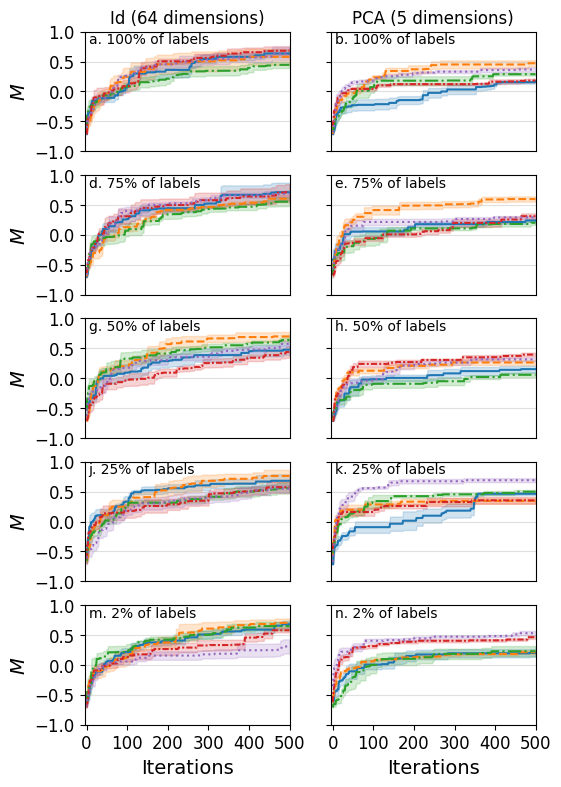

In [21]:
###
# NOTE: properties and percentages were swapped in this cell 
# this was done to see how different properties compare to each other
# on the same panel
#
fig = plt.figure(figsize=(9,9))
grid= fig.add_gridspec(5,3)
fontsize = 14

dim_reduction_method="PCA" # options: ['identity', 'PCA']
box_bounds=10 # options: [5,10]
end_point = 500

linestyles = ['-', '--', '-.', (0, (3, 1, 1, 1)), ':'] 

percentages = [0,25,50,75,98]
for _dim_i, dim_reduction_method in enumerate(["identity", "PCA"]):
    
    properties = ['b','c','h','bc','bch']
    _perc = 98
    for _prop_i, prop in enumerate(percentages):
        ax = fig.add_subplot(grid[_prop_i, _dim_i])
        text_x, text_y = 5, 0.8
        if _prop_i==0:
            if dim_reduction_method=="identity":
                _dim_text = "Id"
            else:
                _dim_text = "PCA"
            ax.set_title(f"{_dim_text} ({_dim_i*5 + (1-_dim_i)*64} dimensions)")
            ax.text(text_x, text_y,f"{subpanel_labels[(_prop_i, _dim_i)]}. {100-prop}% of labels")
        else:
            ax.text(text_x, text_y,f"{subpanel_labels[(_prop_i, _dim_i)]}. {100-prop}% of labels")

        ax.set_ylim([-1.0,1.0])
        ax.set_xlim([-5,500])
        ax.grid(axis='y',alpha=0.4)
        for _perc_i, _perc in enumerate(properties):
            
            _model_name = make_model_name(_perc, "100", prop)
            
            prop_perc = f"{_perc}-{prop}"
            # results[prop_perc] = {}
            print(prop_perc)

            try:
                runs = get_boloop_runs(_model_name, prop, dim_reduction_method, box_bounds)
            except UnboundLocalError as e:
                print(f"encountered unbound local error for {dim_reduction_method=}:",_model_name)
                continue
            
            ### ================ Put into DataFrames ================
            data=pd.DataFrame()
            for i in range(5):
                _data_x = list(range(end_point))#runs[i]['iterations'][:end_point]
                _data_y = runs[i]["best_objective_values"][:end_point]
                if len(_data_y)<end_point:
                    print(f"{prop_perc=} {dim_reduction_method} needs to be run to 500 iters ({len(_data_y)})" )
                    _data_y = _data_y + [np.nan]*(end_point-len(_data_y))
                if i==0:
                    data['iterations']=_data_x
                data[f"run{i}"]=_data_y
        
            melted_data = pd.melt(data, id_vars=["iterations"], value_vars=[f"run{i}" for i in range(5)])
        
            ax = sns.lineplot(data=melted_data, 
                     x="iterations",
                     y="value", 
                     label=_perc,
                     errorbar='se',
                     linestyle=linestyles[_perc_i],
                    ax=ax
            )

            if (_dim_i != 1) or (_prop_i != 0):
                ax.legend_.remove()
            else:
                ax.legend_.remove()
                # ax.legend(title="Property", bbox_to_anchor=(1,1.05))

            if _dim_i==1:
                ax.set_yticklabels([])
                ax.set_ylabel("")
            else:
                _yticklabels = ax.get_yticklabels()
                ax.set_yticklabels(_yticklabels, fontsize=12)
                ax.set_ylabel("$M$", fontsize=fontsize)

            if _prop_i<4:
                ax.set_xticks([])
                ax.set_xlabel("")
            else:
                ax.set_xlabel("Iterations", fontsize=fontsize)
                ax.set_xticks(
                    [x for x in range(0,600,100)],
                    labels=[f"{x}" for x in range(0,600,100)],
                    fontsize=12
                )

# fig.suptitle(f"For a given percentage of labels\nhow do different properties behave")
# fig.tight_layout(h_pad=0.15)
if SAVE_FIGURES:
    _save_filepath ="figures/boloop_results_for_each_perc_vary_prop_ID_vs_PCA" 
    fig.savefig(f"{_save_filepath}.svg",dpi=300)
    # fig.savefig(f"{_save_filepath}.eps",dpi=300)


## grab final values found

In [22]:
fig = plt.figure(figsize=(9,9))
grid= fig.add_gridspec(5,3)
fontsize = 14

dim_reduction_method="PCA" # options: ['identity', 'PCA']
box_bounds=10 # options: [5,10]
end_point = 500

linestyles = ['-', '--', '-.', (0, (3, 1, 1, 1)), ':'] 

percentages = [0,25,50,75,98]
final_points_all = pd.DataFrame()
at100_points_all = pd.DataFrame()
at50_points_all  = pd.DataFrame()
for _dim_i, dim_reduction_method in enumerate(["identity", "PCA"]):
    
    properties = ['b','c','h','bc','bch', "predicted-log10mic"]
    _perc = 98
    for _prop_i, prop in enumerate(percentages):
        # ax = fig.add_subplot(grid[_prop_i, _dim_i])
        text_x, text_y = 5, 0.8
        if _prop_i==0:
            if dim_reduction_method=="identity":
                _dim_text = "Id"
            else:
                _dim_text = "PCA"
            # ax.set_title(f"{_dim_text} ({_dim_i*5 + (1-_dim_i)*64} dimensions)")
            # ax.text(text_x, text_y,f"{subpanel_labels[(_prop_i, _dim_i)]}. {100-prop}% of labels")
        else:
            pass
            # ax.text(text_x, text_y,f"{subpanel_labels[(_prop_i, _dim_i)]}. {100-prop}% of labels")

        # ax.set_ylim([-1.0,1.0])
        # ax.set_xlim([-5,500])
        # ax.grid(axis='y',alpha=0.4)
        for _perc_i, _perc in enumerate(properties):
            if _perc=="predicted-log10mic":
                _prop_name = "oracle"
                if prop not in [0,98]:
                    continue
            else:
                _prop_name = _perc
                
            _model_name = make_model_name(_perc, "100", prop)
            
            prop_perc = f"{_prop_name}-{100-prop}%"
            # results[prop_perc] = {}

            print("========================================================================")
            print(_prop_name in ["bch", "oracle"])
            print(dim_reduction_method=="PCA")
            print("========================================================================")
            if ((_prop_name in ["bch", "oracle"]) and 
                (dim_reduction_method=="PCA") and
                (prop in [0,98])):
                pca_dims=[2,5,10,20,32]
            else:
                pca_dims=[5]

            for n_pca_dims in pca_dims:
                try:
                    runs = get_boloop_runs(_model_name, prop, dim_reduction_method, box_bounds, n_pca_dims=n_pca_dims)
                except UnboundLocalError as e:
                    print(f"encountered unbound local error for {dim_reduction_method=}:",_model_name)
                    continue
                
                _final_points_for_run = []    
                _at100_points_for_run = []
                _at50_points_for_run = []
                ### ================ Put into DataFrames ================
                for i in range(5):
                    _data_y_final = runs[i]["best_objective_values"][end_point-1]
                    _data_y_at100 = runs[i]["best_objective_values"][100-1]
                    _data_y_at50  = runs[i]["best_objective_values"][ 50-1]
                    _final_points_for_run.append(_data_y_final)
                    _at100_points_for_run.append(_data_y_at100)
                    _at50_points_for_run.append( _data_y_at50)

                if dim_reduction_method=="PCA":
                    _dim_text = f"PCA{n_pca_dims}"
                final_points_all[f"{_dim_text}-{prop_perc}"] = _final_points_for_run
                at50_points_all[ f"{_dim_text}-{prop_perc}"] = _at50_points_for_run
                at100_points_all[f"{_dim_text}-{prop_perc}"] = _at100_points_for_run


False
False
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
False
False
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
False
False
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-hydrophobicity-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
False
False
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-boman-chargepH7p2-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
True
False
in first if
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-bch-zScoreNormalized-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
True
False
_fname='boloop_results_identity_neg10to10_transvae-64-peptides-predicted-log10mic-zScoreNormalized-0-organized-cdhit90-zScoreNormalized_log10_mic.pkl'
False
False
_f

<Figure size 900x900 with 0 Axes>

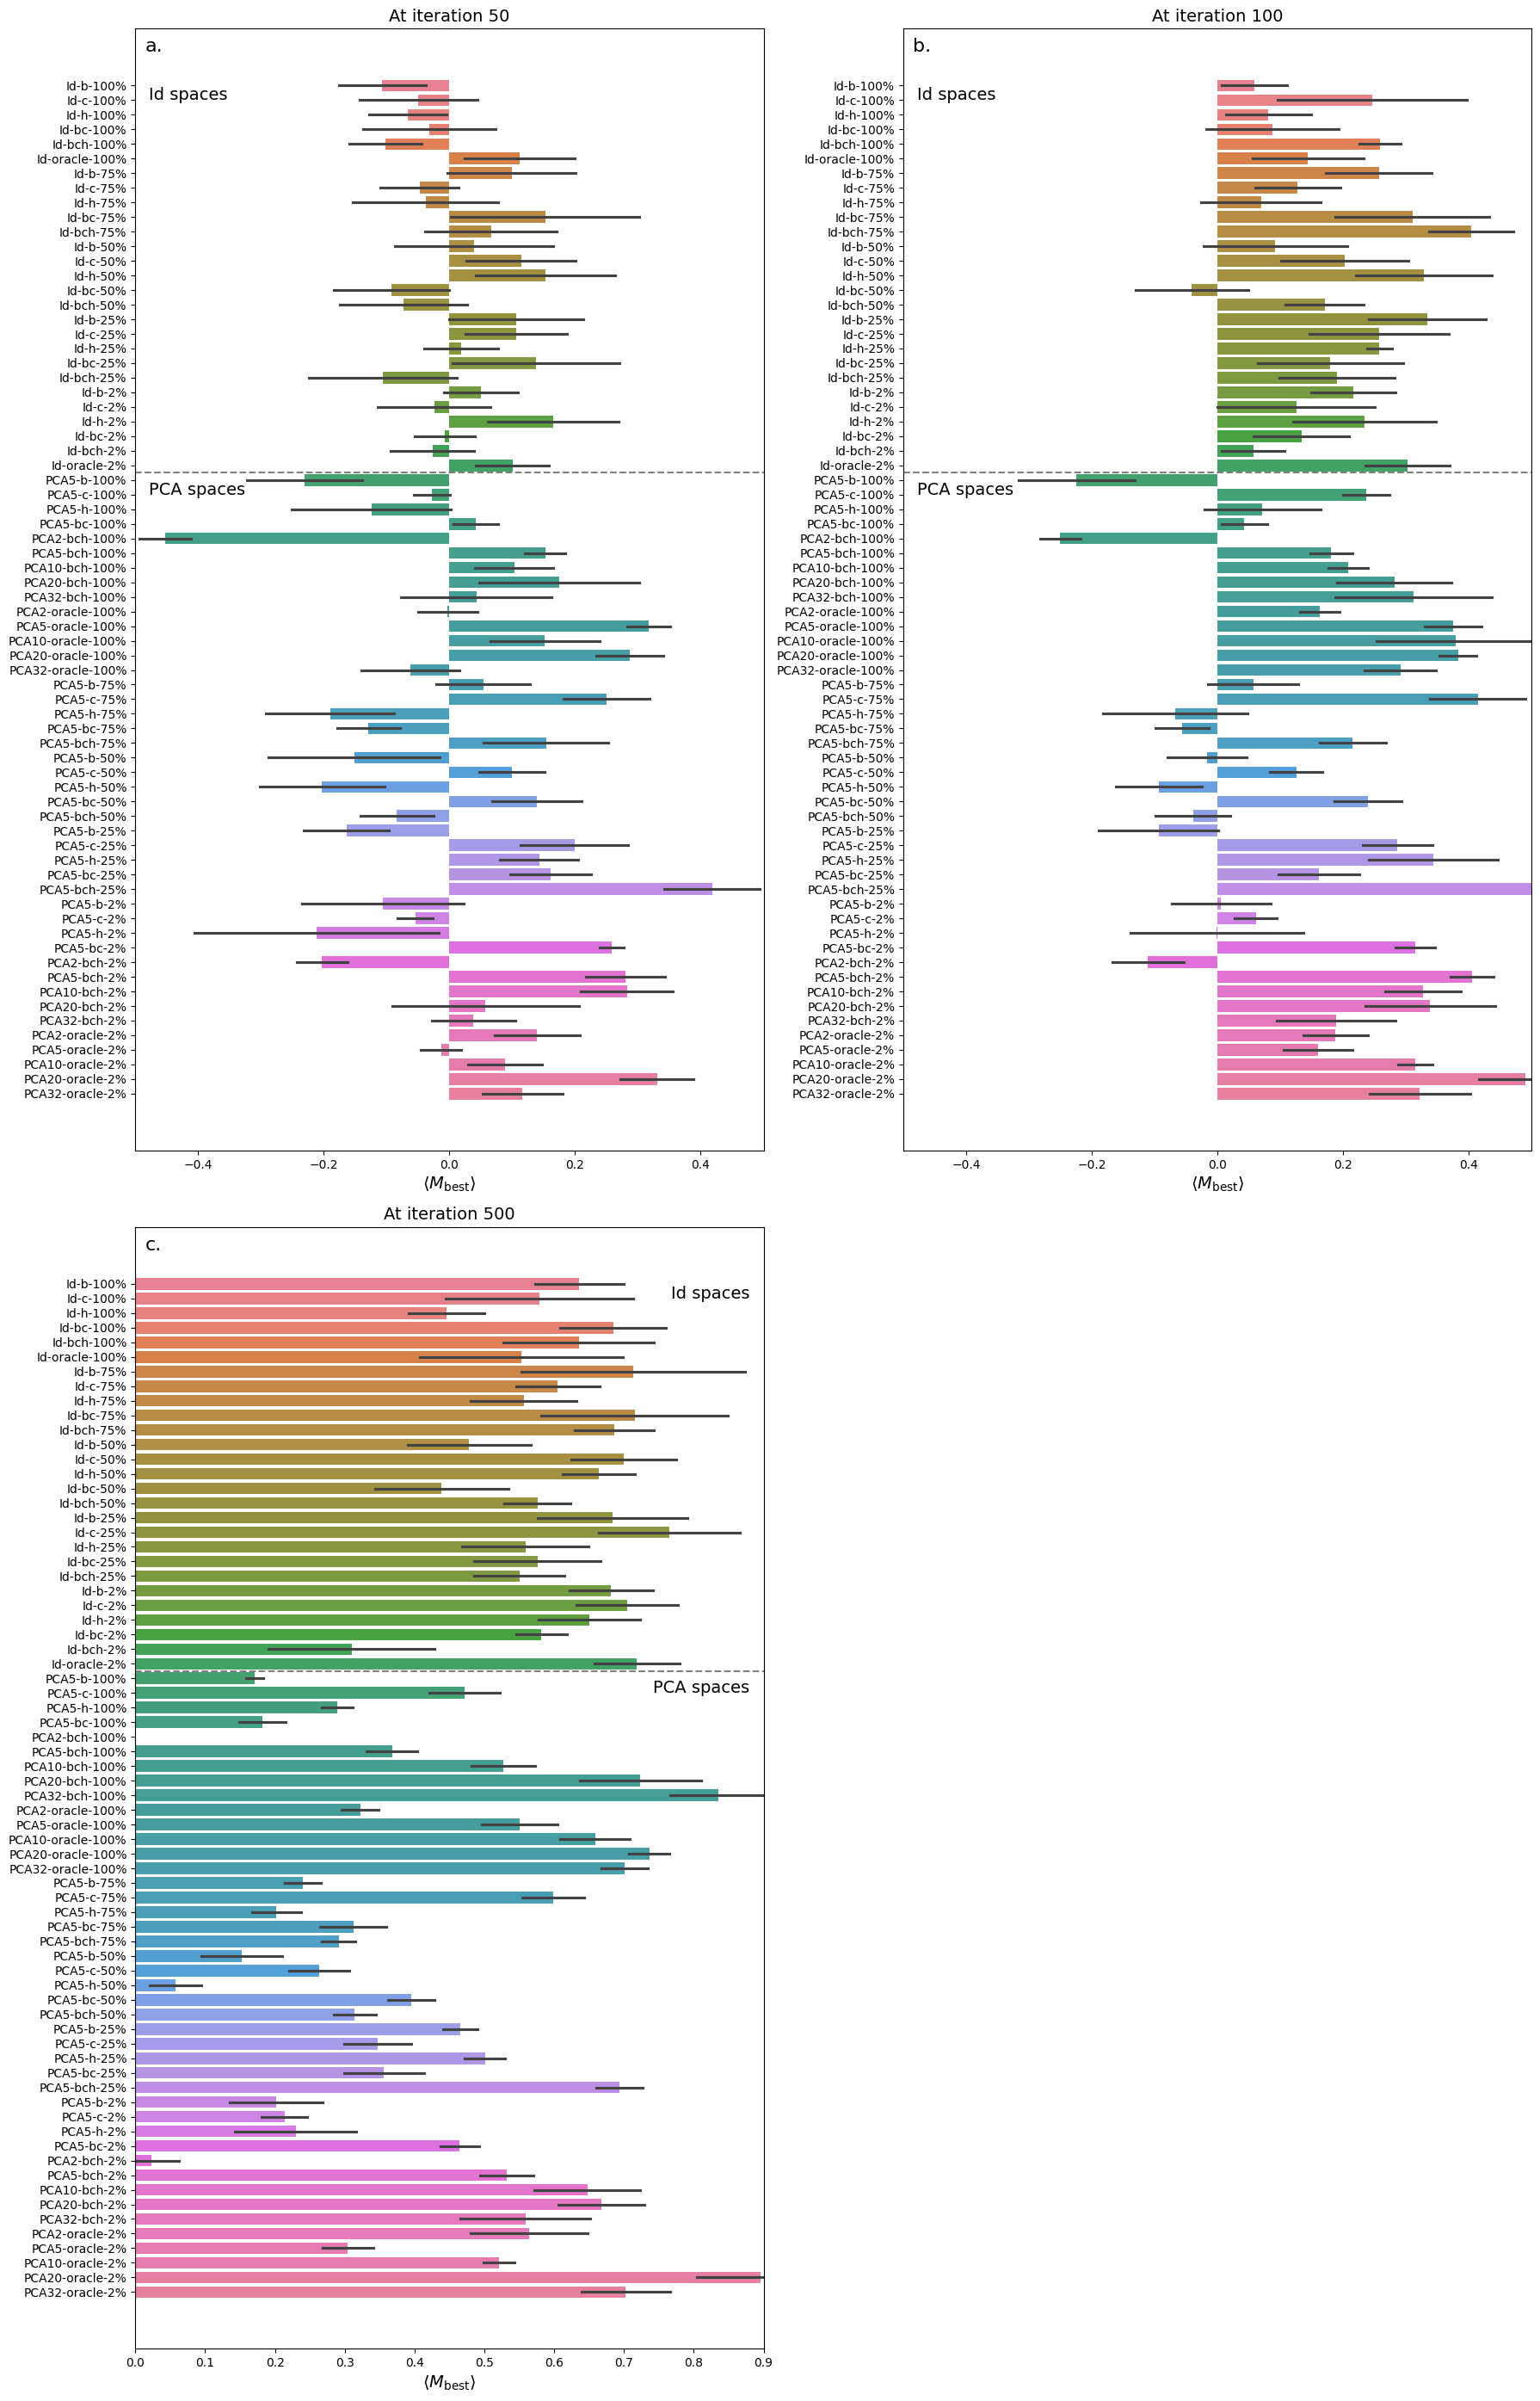

In [23]:
fig = plt.figure(figsize=(18,28))
grid = fig.add_gridspec(2,2)
fontsize=14

ax = fig.add_subplot(grid[0,0])
ax = sns.barplot(at50_points_all, orient='h', errorbar="se", ax=ax)
ax.set_title("At iteration 50", fontsize=fontsize)
ax.set_xlabel("$\\langle M_{\\text{best}} \\rangle$", fontsize=fontsize)
ax.hlines(y=26.5, xmin=-0.5,xmax=0.5, linestyle="--", color="gray")
ax.set_xlim([-0.5,0.5])
ax.text(x = -0.478, y=28, s="PCA spaces", fontsize=fontsize)
ax.text(x = -0.478, y=1, s="Id spaces", fontsize=fontsize)
ax.annotate(
    "a.", 
    xy=(0, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize=16, verticalalignment='top', fontfamily='sans-serif',
)

ax = fig.add_subplot(grid[0,1])
ax = sns.barplot(at100_points_all, orient='h', errorbar="se", ax=ax)
ax.set_title("At iteration 100", fontsize=fontsize)
ax.set_xlabel("$\\langle M_{\\text{best}} \\rangle$", fontsize=fontsize)
ax.hlines(y=26.5, xmin=-0.5,xmax=0.5, linestyle="--", color="gray")
ax.set_xlim([-0.5,0.5])
ax.text(x = -0.478, y=28, s="PCA spaces", fontsize=fontsize)
ax.text(x = -0.478, y=1, s="Id spaces", fontsize=fontsize)
ax.annotate(
    "b.", 
    xy=(0, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize=16, verticalalignment='top', fontfamily='sans-serif',
)

ax = fig.add_subplot(grid[1,0])
ax = sns.barplot(final_points_all, orient='h', errorbar="se", ax=ax)
ax.set_title("At iteration 500", fontsize=fontsize)
ax.set_xlabel("$\\langle M_{\\text{best}} \\rangle$", fontsize=fontsize)
ax.hlines(y=26.5, xmin=0.0,xmax=0.9, linestyle="--", color="gray")
ax.set_xlim([0.0,0.9])
ax.text(x = 0.88, y=28, s="PCA spaces", fontsize=fontsize, ha="right")
ax.text(x = 0.88, y=1, s="Id spaces", fontsize=fontsize, ha="right")
ax.annotate(
    "c.", 
    xy=(0, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize=16, verticalalignment='top', fontfamily='sans-serif',
)

fig.tight_layout()
if SAVE_FIGURES:
    fig.savefig("figures/final_values_barplot.pdf", dpi=300)

In [141]:
for kix, k in zip(final_points_all.mean().index,final_points_all.mean()):
    if "oracle" in kix:
        print(kix, k)


Id-oracle-100% 0.5527838341349198
Id-oracle-2% 0.7186518780505053
PCA2-oracle-100% 0.3219710063649192
PCA5-oracle-100% 0.5502723530652261
PCA10-oracle-100% 0.6585595032370068
PCA20-oracle-100% 0.7365206153108143
PCA32-oracle-100% 0.7009513717244314
PCA2-oracle-2% 0.5641438832746315
PCA5-oracle-2% 0.3045349531416683
PCA10-oracle-2% 0.5209505604991611
PCA20-oracle-2% 0.8959891873599934
PCA32-oracle-2% 0.702488385640484


In [143]:
for kix, k in zip(final_points_all.mean().index, final_points_all.std()/np.sqrt(5)):
    if "oracle" in kix:
        print(kix, k)

Id-oracle-100% 0.14508548675995514
Id-oracle-2% 0.06076188561747551
PCA2-oracle-100% 0.026860280403611454
PCA5-oracle-100% 0.05411653348516122
PCA10-oracle-100% 0.05028910367361955
PCA20-oracle-100% 0.0288207743069442
PCA32-oracle-100% 0.033861925761535766
PCA2-oracle-2% 0.08351725372754577
PCA5-oracle-2% 0.03666252762966629
PCA10-oracle-2% 0.022680000510575483
PCA20-oracle-2% 0.09151535200655232
PCA32-oracle-2% 0.06378730005156566


## Plot bar graph for iteration 50

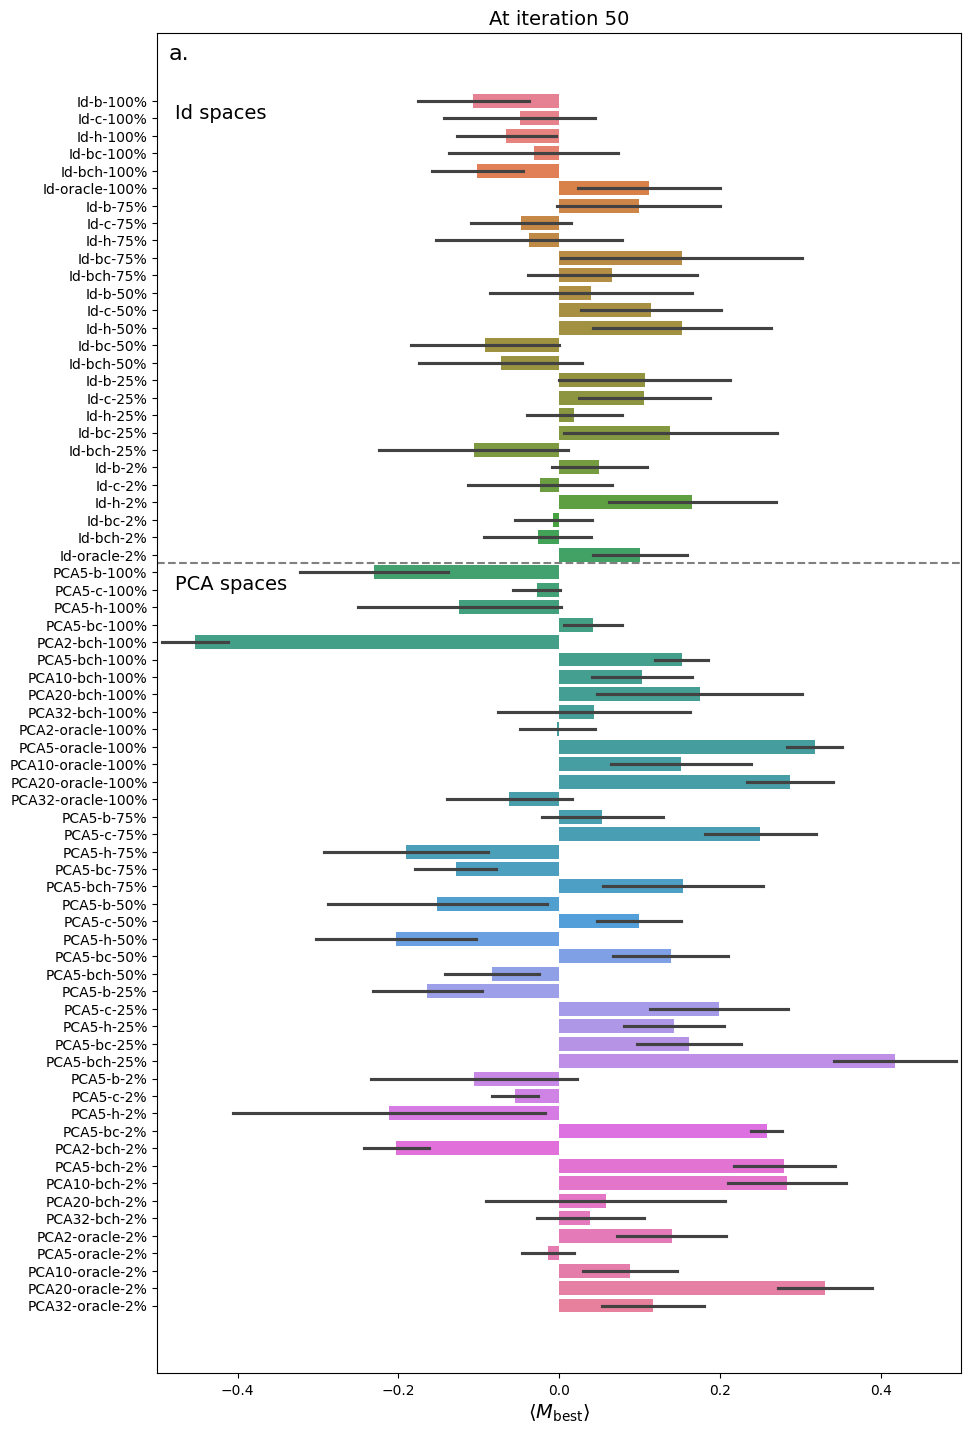

In [24]:
fig = plt.figure(figsize=(18,28))
grid = fig.add_gridspec(2,2)
fontsize=14

ax = fig.add_subplot(grid[0,0])
ax = sns.barplot(at50_points_all, orient='h', errorbar="se", ax=ax)
ax.set_title("At iteration 50", fontsize=fontsize)
ax.set_xlabel("$\\langle M_{\\text{best}} \\rangle$", fontsize=fontsize)
ax.hlines(y=26.5, xmin=-0.5,xmax=0.5, linestyle="--", color="gray")
ax.set_xlim([-0.5,0.5])
ax.text(x = -0.478, y=28, s="PCA spaces", fontsize=fontsize)
ax.text(x = -0.478, y=1, s="Id spaces", fontsize=fontsize)
ax.annotate(
    "a.", 
    xy=(0, 1), xycoords='axes fraction',
    xytext=(+0.5, -0.5), textcoords='offset fontsize',
    fontsize=16, verticalalignment='top', fontfamily='sans-serif',
)

fig.tight_layout()
if SAVE_FIGURES:
    fig.savefig("figures/final_values_barplot.pdf", dpi=300)

In [26]:
s.columns

Index(['Id-b-100%', 'Id-c-100%', 'Id-h-100%', 'Id-bc-100%', 'Id-bch-100%',
       'Id-oracle-100%', 'Id-b-75%', 'Id-c-75%', 'Id-h-75%', 'Id-bc-75%',
       'Id-bch-75%', 'Id-b-50%', 'Id-c-50%', 'Id-h-50%', 'Id-bc-50%',
       'Id-bch-50%', 'Id-b-25%', 'Id-c-25%', 'Id-h-25%', 'Id-bc-25%',
       'Id-bch-25%', 'Id-b-2%', 'Id-c-2%', 'Id-h-2%', 'Id-bc-2%', 'Id-bch-2%',
       'Id-oracle-2%', 'PCA5-b-100%', 'PCA5-c-100%', 'PCA5-h-100%',
       'PCA5-bc-100%', 'PCA2-bch-100%', 'PCA5-bch-100%', 'PCA10-bch-100%',
       'PCA20-bch-100%', 'PCA32-bch-100%', 'PCA2-oracle-100%',
       'PCA5-oracle-100%', 'PCA10-oracle-100%', 'PCA20-oracle-100%',
       'PCA32-oracle-100%', 'PCA5-b-75%', 'PCA5-c-75%', 'PCA5-h-75%',
       'PCA5-bc-75%', 'PCA5-bch-75%', 'PCA5-b-50%', 'PCA5-c-50%', 'PCA5-h-50%',
       'PCA5-bc-50%', 'PCA5-bch-50%', 'PCA5-b-25%', 'PCA5-c-25%', 'PCA5-h-25%',
       'PCA5-bc-25%', 'PCA5-bch-25%', 'PCA5-b-2%', 'PCA5-c-2%', 'PCA5-h-2%',
       'PCA5-bc-2%', 'PCA2-bch-2%', 'PCA5-bch-2%',

In [128]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 0) Wide -> long ---------------------------------------------------------
# at50_points_all: rows = replicates/runs, columns = labels shown in your listing
long = at50_points_all.melt(var_name="label", value_name="value")
long = at100_points_all.melt(var_name="label", value_name="value")
long = final_points_all.melt(var_name="label", value_name="value")

# --- 1) Parsers ---------------------------------------------------------------
def parse_cat(lbl: str) -> str:
    # longest-first; collapse bh/cb/hb to 'bc' if such typos ever appear
    for pat in ("bch","bc","oracle","bh","cb","hb","b","c","h"):
        if re.search(rf"(?:^|[-_]){pat}(?:[-_]|$)", lbl):
            return "bc" if pat in {"bh","cb","hb"} else pat
    return "other"

def parse_pct(lbl: str) -> int:
    m = re.search(r"(\d+)%", lbl)
    return int(m.group(1)) if m else 100

def parse_block(lbl: str) -> str:
    return "PCA" if lbl.startswith("PCA") else "Id"

def parse_pca_dim(lbl: str) -> int | None:
    m = re.search(r"^PCA(\d+)", lbl)
    return int(m.group(1)) if m else None

long["cat"]   = long["label"].map(parse_cat)
long["pct"]   = long["label"].map(parse_pct)
long["block"] = long["label"].map(parse_block)
long["pca_k"] = long["label"].map(parse_pca_dim)

# --- 2) Sorting logic: by block (Id→PCA), then % bucket, then mean value desc
means = long.groupby("label", as_index=False)["value"].mean().rename(columns={"value":"mean"})
meta  = long[["label","cat","pct","block","pca_k"]].drop_duplicates()
order_df = (meta.merge(means, on="label")
                .assign(pct=lambda d: pd.Categorical(d["pct"],
                            categories=sorted(d["pct"].unique(), reverse=True), ordered=True))
                .sort_values(["block","pct","mean"], ascending=[True, True, False])
           )
label_order = order_df["label"].tolist()

# Push the order into the long df
long["label"] = pd.Categorical(long["label"], categories=label_order, ordered=True)
pct_order = list(order_df["pct"].cat.categories)

# --- 3) Palette ---------------------------------------------------------------
base = sns.color_palette("Set1", 6)
palette = {"b": base[0], "c": base[1], "h": base[2], "bc": base[3], "bch": base[4], "oracle": base[5], "other": (.5,.5,.5)}
hue_order = ["bch","bc","b","c","h","oracle"]#,"other"]

# --- 4A) Single-panel with faint banded backgrounds per contiguous % run -----
def plot_banded(data: pd.DataFrame, title="At iteration 50", xlim=(-0.5,0.5), fontsize=18, band_pattern="gradient"):
    assert band_pattern in ["gradient","alternating"]
    
    fig, ax = plt.subplots(figsize=(18, 28))
    sns.barplot(
        data=data, y="label", x="value",
        hue="cat", hue_order=hue_order, palette=palette,
        orient="h", errorbar="se", dodge=False, ax=ax
    )

    # Build contiguous runs of the same % (handles Id and PCA blocks separately)
    ordered = (data[["label","pct","block"]].drop_duplicates()
                    .sort_values("label"))  # matches y-order
    y_index = {lbl:i for i,lbl in enumerate(data["label"].cat.categories)}
    runs = []
    cur_pct = None; start = None
    for i, row in ordered.iterrows():
        pct = row["pct"]; y = y_index[row["label"]]
        if cur_pct is None:
            cur_pct, start, last = pct, y, y
            continue
        if pct != cur_pct:
            runs.append((cur_pct, start, last))
            cur_pct, start = pct, y
        last = y
    if cur_pct is not None:
        runs.append((cur_pct, start, last))

    # Draw faint bands and annotate each run with its % label
    _band_pattern = band_pattern # choices: ["gradient", "alternating"]
    for j, (pct, y0, y1) in enumerate(runs):
        if _band_pattern=="alternating":
            ax.axhspan(y0-0.5, y1+0.5, color="k", alpha=0.05 if j%2==0 else 0.09, zorder=0)
        elif _band_pattern=="gradient":
            ax.axhspan(y0-0.5, y1+0.5, color="k", alpha=0.04*(5- (j%5)), zorder=0)
        else:
            raise NotImplementedError()
        ax.text(xlim[0]+0.01, (y0+y1)/2, f"{int(pct)}%", va="center", ha="left", fontsize=18, alpha=0.75)

    # Id/PCA separator (computed, not hard-coded)
    id_count = (ordered["block"]=="Id").sum()
    if id_count>0:
        ax.hlines(id_count-0.5, *xlim, ls="--", lw=4, color="black")
    # Annotate Id and PCA blocks with arrows
    ax.text(xlim[0]+0.225, id_count - 1.0, "   Id spaces $\\uparrow$",  ha="right", va="bottom", fontsize=fontsize, fontweight="bold")
    ax.text(xlim[0]+0.225, id_count + 0.25, "PCA spaces $\\downarrow$", ha="right", va="top", fontsize=fontsize, fontweight="bold")


    ax.axvline(0, lw=1, ls=":", c="gray", zorder=1)
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(r"$\langle M_{\text{best}} \rangle$", fontsize=fontsize)
    ax.set_xlim(*xlim)
    
    ax.set_ylabel("")
    
    ax.tick_params(axis="y", labelsize=16)
    ax.tick_params(axis="x", labelsize=16)
    
    ax.legend(title="Class", frameon=False, ncol=3, fontsize=18, title_fontsize=19, loc="lower right")
    plt.tight_layout()
    return fig, ax


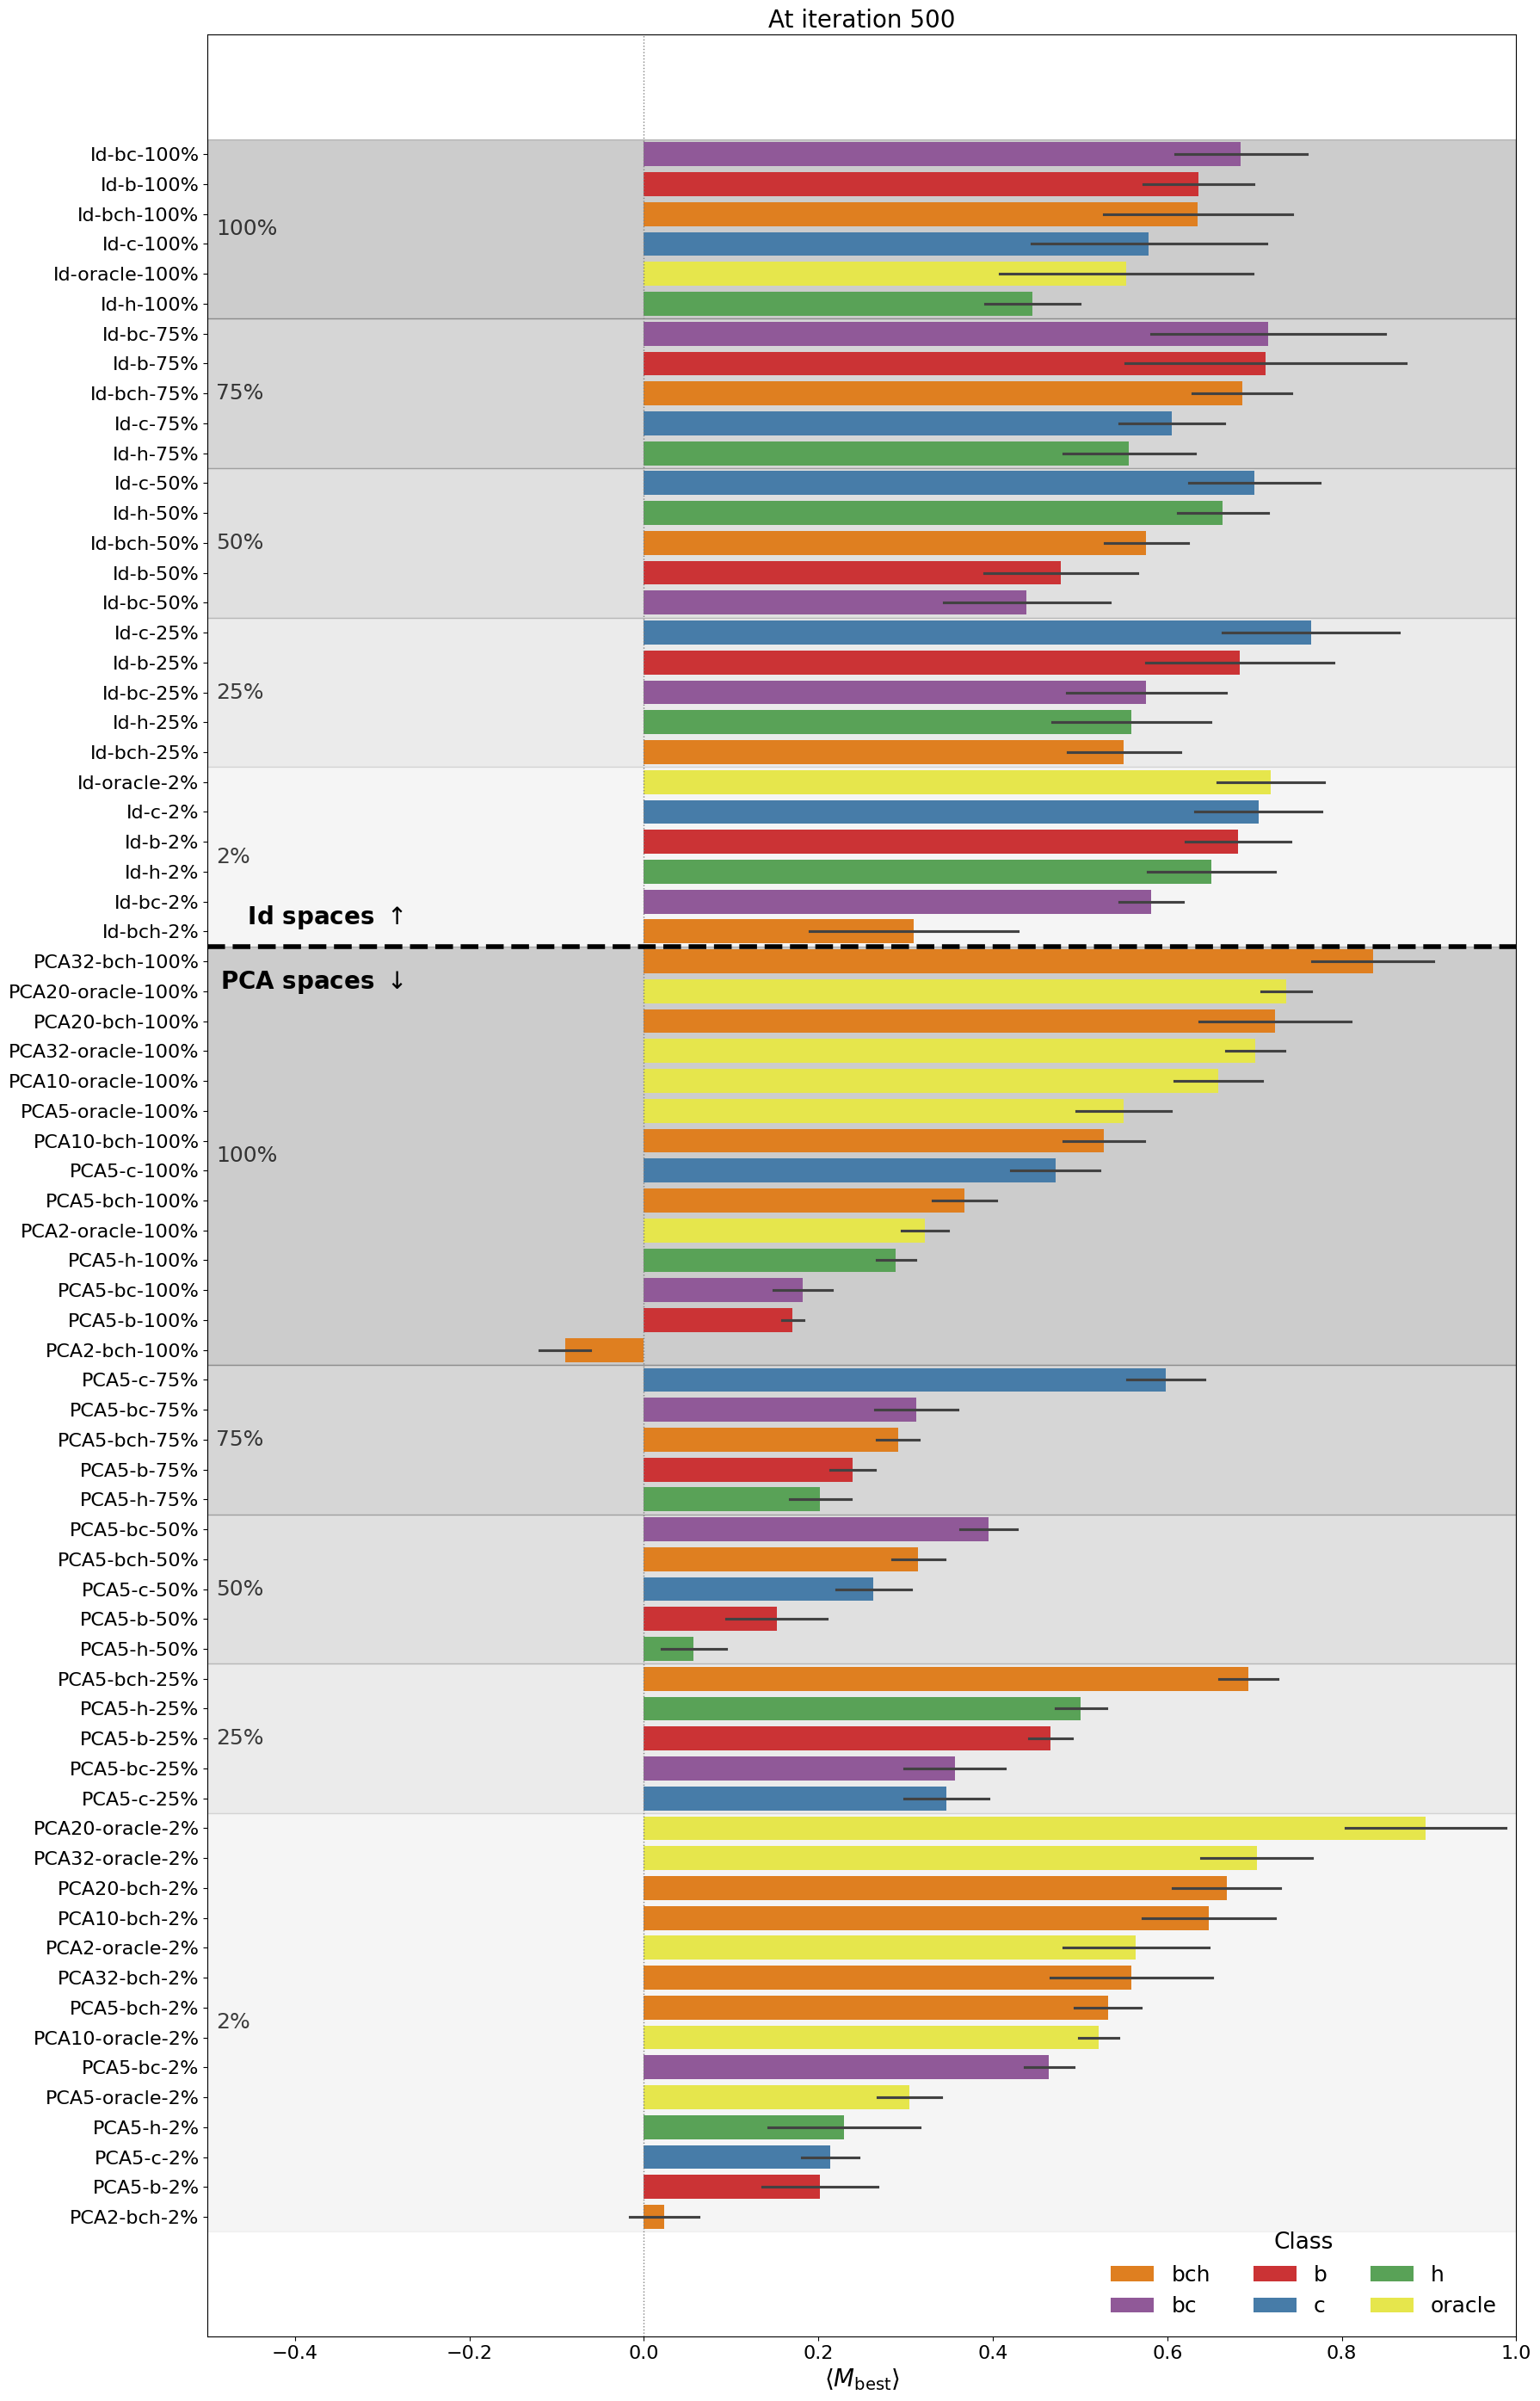

In [129]:
fig, ax = plot_banded(long, title="At iteration 500", xlim=(-0.5,1.0), fontsize=20)


In [130]:
fig.savefig("figures/final_values_barplot_it500.pdf",dpi=300)

# check difference in best objective value seen when matching runs

In [19]:
###
# NOTE: properties and percentages were swapped in this cell 
# this was done to see how different properties compare to each other
# on the same panel
#
dim_reduction_method="PCA" # options: ['identity', 'PCA']
box_bounds=10 # options: [5,10]
end_point = 500

percentages = [0,25,50,75,98]
search_space_to_runs = {}
for _dim_i, dim_reduction_method in enumerate(["identity", "PCA"]):
    
    properties = ['b','c','h','bc','bch']
    _perc = 98
    for _prop_i, prop in enumerate(percentages):
        for _perc_i, _perc in enumerate(properties):
            
            _model_name = make_model_name(_perc, "100", prop)
            
            prop_perc = f"{dim_reduction_method}-{_perc}-{prop}"
            # results[prop_perc] = {}
            print(prop_perc)

            try:
                runs = get_boloop_runs(_model_name, prop, dim_reduction_method, box_bounds)
            except UnboundLocalError as e:
                print(f"encountered unbound local error for {dim_reduction_method=}:",_model_name)
                continue
            
            ### ================ Put into DataFrames ================
            data=pd.DataFrame()
            for i in range(5):
                _data_x = list(range(end_point))#runs[i]['iterations'][:end_point]
                _data_y = runs[i]["best_objective_values"][:end_point]
                if len(_data_y)<end_point:
                    print(f"{prop_perc=} {dim_reduction_method} needs to be run to 500 iters ({len(_data_y)})" )
                    _data_y = _data_y + [np.nan]*(end_point-len(_data_y))
                if i==0:
                    data['iterations']=_data_x
                data[f"run{i}"]=_data_y
                
            search_space_to_runs[prop_perc] = data
            # melted_data = pd.melt(data, id_vars=["iterations"], value_vars=[f"run{i}" for i in range(5)])


identity-b-0
identity-c-0
identity-h-0
identity-bc-0
identity-bch-0
identity-b-25
identity-c-25
identity-h-25
identity-bc-25
identity-bch-25
identity-b-50
identity-c-50
identity-h-50
identity-bc-50
identity-bch-50
identity-b-75
identity-c-75
identity-h-75
identity-bc-75
identity-bch-75
identity-b-98
identity-c-98
identity-h-98
identity-bc-98
identity-bch-98
PCA-b-0
PCA-c-0
PCA-h-0
PCA-bc-0
PCA-bch-0
PCA-b-25
PCA-c-25
PCA-h-25
PCA-bc-25
PCA-bch-25
PCA-b-50
PCA-c-50
PCA-h-50
PCA-bc-50
PCA-bch-50
PCA-b-75
PCA-c-75
PCA-h-75
PCA-bc-75
PCA-bch-75
PCA-b-98
PCA-c-98
PCA-h-98
PCA-bc-98
PCA-bch-98


In [20]:
search_space_to_runs.keys()

dict_keys(['identity-b-0', 'identity-c-0', 'identity-h-0', 'identity-bc-0', 'identity-bch-0', 'identity-b-25', 'identity-c-25', 'identity-h-25', 'identity-bc-25', 'identity-bch-25', 'identity-b-50', 'identity-c-50', 'identity-h-50', 'identity-bc-50', 'identity-bch-50', 'identity-b-75', 'identity-c-75', 'identity-h-75', 'identity-bc-75', 'identity-bch-75', 'identity-b-98', 'identity-c-98', 'identity-h-98', 'identity-bc-98', 'identity-bch-98', 'PCA-b-0', 'PCA-c-0', 'PCA-h-0', 'PCA-bc-0', 'PCA-bch-0', 'PCA-b-25', 'PCA-c-25', 'PCA-h-25', 'PCA-bc-25', 'PCA-bch-25', 'PCA-b-50', 'PCA-c-50', 'PCA-h-50', 'PCA-bc-50', 'PCA-bch-50', 'PCA-b-75', 'PCA-c-75', 'PCA-h-75', 'PCA-bc-75', 'PCA-bch-75', 'PCA-b-98', 'PCA-c-98', 'PCA-h-98', 'PCA-bc-98', 'PCA-bch-98'])

In [21]:
# fig = plt.figure(figsize=(6,9))
# grid= fig.add_gridspec(5,1)
fontsize = 14

linestyles = ['-', '--', '-.', (0, (3, 1, 1, 1)), ':'] 

_run_cols = [f"run{i}" for i in range(5)]
search_space_to_diff = {}
for _perc_i, _perc in enumerate(percentages):
    ax = fig.add_subplot(grid[_perc_i,2])
    axpos = ax.get_position()
    ax.set_position([axpos.x0 + 0.075, axpos.y0, axpos.width, axpos.height])  # shift right
    
    text_x, text_y = 1, 0.8
    if _perc_i==0:
        if dim_reduction_method=="identity":
            _dim_text = "Id"
        else:
            _dim_text = "PCA"
        # ax.set_title(f"Label percentage: {1-_perc}\%")
        ax.text(text_x, text_y,f"{subpanel_labels[(_perc_i,2)]}. {100-_perc}% of labels")
    else:
        ax.text(text_x, text_y,f"{subpanel_labels[(_perc_i,2)]}. {100-_perc}% of labels")

    ax.set_ylim([-1.0,1.0])
    # ax.set_ylim([0.0,1.0])
    ax.set_xlim([0,100])
    ax.grid(axis='y',alpha=0.4)

    for _prop_i, _prop in enumerate(properties):
        
        
        _id_run  = f"identity-{_prop}-{_perc}"
        _pca_run =      f"PCA-{_prop}-{_perc}"

        _id_runs  = search_space_to_runs[ _id_run]
        _pca_runs = search_space_to_runs[_pca_run]

        # get difference
        _diff = (_pca_runs[_run_cols] - _id_runs[_run_cols] )
        _diff["iterations"] = _pca_runs.iterations
        search_space_to_diff[f"{_prop}-{_perc}"] = _diff
        
        melted_data = pd.melt(_diff, id_vars=["iterations"], value_vars=_run_cols)

        # ax = sns.lineplot(data=melted_data, 
        #          x="iterations",
        #          y="value", 
        #          label=_prop,
        #          errorbar='se',
        #          linestyle=linestyles[_prop_i],
        #          ax=ax
        # )

        ########################
        # estimate
        _ratio_change = np.mean(_diff[_run_cols],axis=1)
        # _ratio_change = np.mean( ( _pca_runs[_run_cols] - _id_runs[_run_cols] )/np.abs(_id_runs[_run_cols]), axis=1)
        # _ratio_change = np.mean( ( _pca_runs[_run_cols] ) -np.mean(  _id_runs[_run_cols] ) )/np.abs( np.mean( _id_runs[_run_cols], axis=1) ) 

        # Standard error in estimate over N=5
        propagated_error =np.sqrt( np.var(_pca_runs[_run_cols],axis=1) + np.var(_id_runs[_run_cols],axis=1) )
        yerr = propagated_error / np.sqrt(5)

        ########################
        # Plot line
        color_name=f"C{_prop_i}"
        ax.plot(_diff['iterations'], 
                _ratio_change, 
                color=color_name,
                linestyle=linestyles[_prop_i],
                label=_prop
        )
        
        # Shaded error region
        ax.fill_between(
            _diff['iterations'],
            _ratio_change - yerr,
            _ratio_change + yerr,
            color=color_name,
            linestyles=linestyles[_prop_i],
            alpha=0.3,
        )

        if _perc_i==0:
            ax.legend(
                title="Properties", 
                loc="upper left", 
                bbox_to_anchor=(1.02,1.075),
                fontsize=12,
                title_fontsize=12
            )
        else:
            # ax.legend_.remove()
            pass
        
        ax.set_xlabel("Iterations", fontsize=16)
        if _perc_i <4:
            _xticks = ax.get_xticks()
            ax.set_xticks([]*len(_xticks))
            ax.set_xlabel("")
        else:
            _xticklabels = ax.get_xticklabels()
            ax.set_xticklabels(_xticklabels, fontsize=12)

        _yticklabels=ax.get_yticklabels()
        ax.set_yticklabels(_yticklabels,fontsize=12)
        if _perc_i%2==1:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("$S_{\\text{diff}}$", fontsize=16)
    # fig.supylabel("$S_{\\text{diff}}$", fontsize=16)

if SAVE_FIGURES:
    _save_filepath ="figures/boloop_differences_properties" 
    fig.savefig(f"{_save_filepath}.svg",dpi=300)
    # fig.savefig(f"{_save_filepath}.eps",dpi=300)

/tmp/ipykernel_18549/2693781159.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels,fontsize=12)
/tmp/ipykernel_18549/2693781159.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels,fontsize=12)
/tmp/ipykernel_18549/2693781159.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels,fontsize=12)
/tmp/ipykernel_18549/2693781159.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(_yticklabels,fontsize=12)
/tmp/ipykernel_18549/2693781159.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

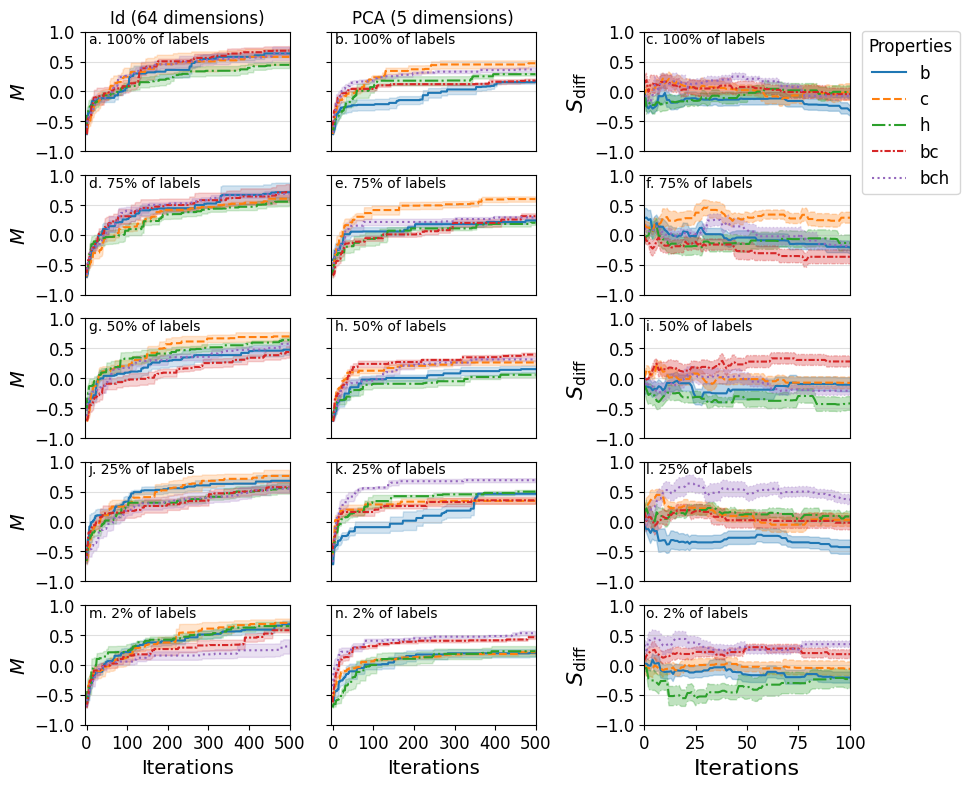

In [22]:
fig

In [23]:
if SAVE_FIGURES:
    fig.savefig("figures/boloop_results_for_each_perc_vary_prop_ID_vs_PCA.pdf",dpi=300, bbox_inches='tight')

In [24]:
def compute_std_in_ratio(x,y):
    _mu_x = np.mean(x,axis=1)
    _mu_y = np.mean(y,axis=1)
    _std_x = np.std(x, axis=1)
    _std_y = np.std(y, axis=1)

    _mult_factor = (_mu_x/(_mu_y + 1e-5))**2
    _term1 = (_std_x**2)/((_mu_x**2) + 1e-5)
    _term2 = (_std_y**2)/((_mu_y**2) + 1e-5)

    _var_ratio = _mult_factor*(_term1 + _term2)
    return np.sqrt(_var_ratio)

/tmp/ipykernel_18549/497694575.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
/tmp/ipykernel_18549/497694575.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
/tmp/ipykernel_18549/497694575.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
/tmp/ipykernel_18549/497694575.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with

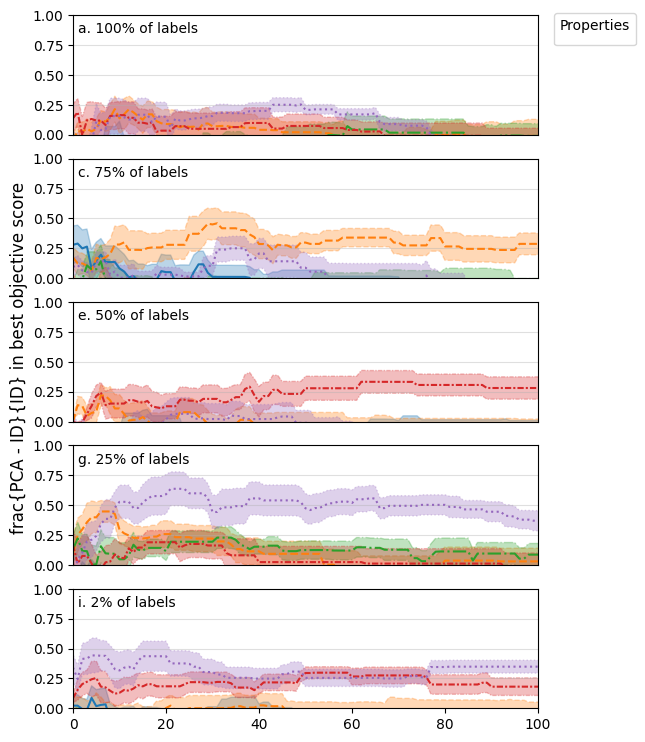

In [25]:
fig = plt.figure(figsize=(6,9))
grid= fig.add_gridspec(5,1)
fontsize = 14

linestyles = ['-', '--', '-.', (0, (3, 1, 1, 1)), ':'] 
subpanel_labels = {
    (0, 0): 'a',
    (1, 0): 'b',
    (0, 1): 'c',
    (1, 1): 'd',
    (0, 2): 'e',
    (1, 2): 'f',
    (0, 3): 'g',
    (1, 3): 'h',
    (0, 4): 'i',
    (1, 4): "j"
}

_run_cols = [f"run{i}" for i in range(5)]
search_space_to_diff = {}
for _perc_i, _perc in enumerate(percentages):
    ax = fig.add_subplot(grid[_perc_i])
    text_x, text_y = 1, 0.85
    if _perc_i==0:
        if dim_reduction_method=="identity":
            _dim_text = "Id"
        else:
            _dim_text = "PCA"
        # ax.set_title(f"Label percentage: {1-_perc}\%")
        ax.text(text_x, text_y,f"{subpanel_labels[0,_perc_i]}. {100-_perc}% of labels")
    else:
        ax.text(text_x, text_y,f"{subpanel_labels[0,_perc_i]}. {100-_perc}% of labels")

    ax.set_ylim([0.0,1.0])
    # ax.set_ylim([0.0,20.0])
    ax.set_xlim([0,100])
    ax.grid(axis='y',alpha=0.4)

    for _prop_i, _prop in enumerate(properties):
        
        
        _id_run  = f"identity-{_prop}-{_perc}"
        _pca_run =      f"PCA-{_prop}-{_perc}"

        _id_runs  = search_space_to_runs[ _id_run]
        _pca_runs = search_space_to_runs[_pca_run]

        # get difference
        _diff = (_pca_runs[_run_cols] - _id_runs[_run_cols] )#/np.abs(_id_runs[_run_cols])
        _diff["iterations"] = _pca_runs.iterations
        search_space_to_diff[f"{_prop}-{_perc}"] = _diff
        
        melted_data = pd.melt(_diff, id_vars=["iterations"], value_vars=_run_cols)

        # estimate
        _ratio_change = np.mean(_diff[_run_cols],axis=1)
        # _ratio_change = np.mean( ( _pca_runs[_run_cols] - _id_runs[_run_cols] )/np.abs(_id_runs[_run_cols]), axis=1)
        # _ratio_change = np.mean( ( _pca_runs[_run_cols] ) -np.mean(  _id_runs[_run_cols] ) )/np.abs( np.mean( _id_runs[_run_cols], axis=1) ) 

        # Standard error in estimate over N=5
        propagated_error = compute_std_in_ratio(_pca_runs[_run_cols], _id_runs[_run_cols])
        propagated_error =np.sqrt( np.var(_pca_runs[_run_cols],axis=1) + np.var(_id_runs[_run_cols],axis=1) )
        yerr = propagated_error / np.sqrt(5)
        
        # Plot line
        color_name=f"C{_prop_i}"
        ax.plot(_diff['iterations'], 
                _ratio_change, 
                color=color_name,
                linestyle=linestyles[_prop_i]
        )
        
        # Shaded error region
        ax.fill_between(
            _diff['iterations'],
            _ratio_change - yerr,
            _ratio_change + yerr,
            color=color_name,
            linestyles=linestyles[_prop_i],
            alpha=0.3,
        )
        
        if _perc_i==0:
            ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
        else:
            pass
            # ax.legend_.remove()

        if _perc_i < 4:
            _xticks = ax.get_xticks()
            ax.set_xticks([]*len(_xticks))
            ax.set_xlabel("")
        ax.set_ylabel("")
    fig.supylabel("frac{PCA - ID}{ID} in best objective score")

if SAVE_FIGURES:
    _save_filepath ="figures/boloop_differences_properties" 
    fig.savefig(f"{_save_filepath}.svg",dpi=300)
    fig.savefig(f"{_save_filepath}.eps",dpi=300)

# Use Percent change instead of difference

/tmp/ipykernel_18549/1711966889.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
/tmp/ipykernel_18549/1711966889.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
/tmp/ipykernel_18549/1711966889.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
/tmp/ipykernel_18549/1711966889.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start 

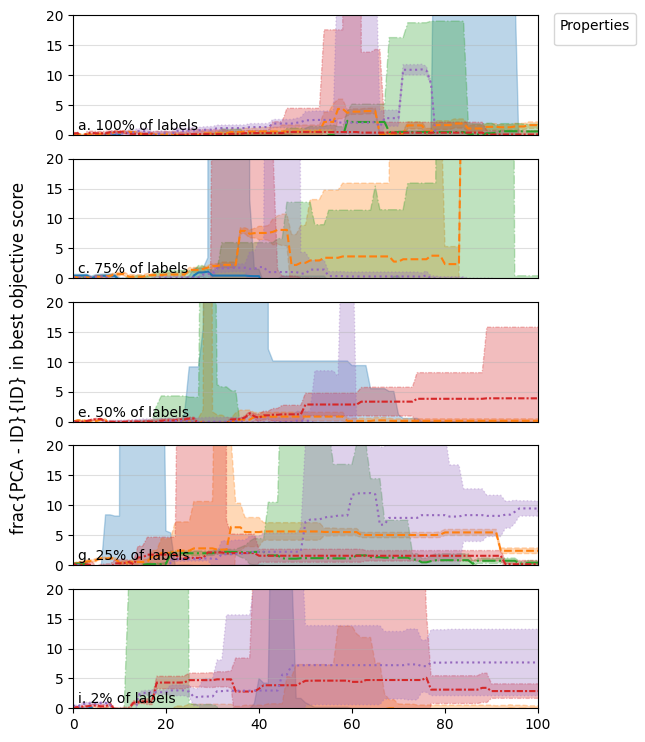

In [26]:
fig = plt.figure(figsize=(6,9))
grid= fig.add_gridspec(5,1)
fontsize = 14

linestyles = ['-', '--', '-.', (0, (3, 1, 1, 1)), ':'] 
subpanel_labels = {
    (0, 0): 'a',
    (1, 0): 'b',
    (0, 1): 'c',
    (1, 1): 'd',
    (0, 2): 'e',
    (1, 2): 'f',
    (0, 3): 'g',
    (1, 3): 'h',
    (0, 4): 'i',
    (1, 4): "j"
}

_run_cols = [f"run{i}" for i in range(5)]
search_space_to_diff = {}
for _perc_i, _perc in enumerate(percentages):
    ax = fig.add_subplot(grid[_perc_i])
    text_x, text_y = 1, 0.85
    if _perc_i==0:
        if dim_reduction_method=="identity":
            _dim_text = "Id"
        else:
            _dim_text = "PCA"
        # ax.set_title(f"Label percentage: {1-_perc}\%")
        ax.text(text_x, text_y,f"{subpanel_labels[0,_perc_i]}. {100-_perc}% of labels")
    else:
        ax.text(text_x, text_y,f"{subpanel_labels[0,_perc_i]}. {100-_perc}% of labels")

    # ax.set_ylim([0.0,1.0])
    ax.set_ylim([0.0,20.0])
    ax.set_xlim([0,100])
    ax.grid(axis='y',alpha=0.4)

    for _prop_i, _prop in enumerate(properties):
        
        
        _id_run  = f"identity-{_prop}-{_perc}"
        _pca_run =      f"PCA-{_prop}-{_perc}"

        _id_runs  = search_space_to_runs[ _id_run]
        _pca_runs = search_space_to_runs[_pca_run]

        # get difference
        _diff = (_pca_runs[_run_cols] - _id_runs[_run_cols] )#/np.abs(_id_runs[_run_cols])
        _diff["iterations"] = _pca_runs.iterations
        search_space_to_diff[f"{_prop}-{_perc}"] = _diff
        
        melted_data = pd.melt(_diff, id_vars=["iterations"], value_vars=_run_cols)

        # estimate
        # _ratio_change = np.mean(_diff[_run_cols],axis=1)
        _ratio_change = np.mean( ( _pca_runs[_run_cols] - _id_runs[_run_cols] )/np.abs(_id_runs[_run_cols]), axis=1)
        # _ratio_change = np.mean( ( _pca_runs[_run_cols] ) -np.mean(  _id_runs[_run_cols] ) )/np.abs( np.mean( _id_runs[_run_cols], axis=1) ) 

        # Standard error in estimate over N=5
        propagated_error = compute_std_in_ratio(_pca_runs[_run_cols], _id_runs[_run_cols])
        # propagated_error =np.sqrt( np.var(_pca_runs[_run_cols],axis=1) + np.var(_id_runs[_run_cols],axis=1) )
        yerr = propagated_error / np.sqrt(5)
        
        # Plot line
        color_name=f"C{_prop_i}"
        ax.plot(_diff['iterations'], 
                _ratio_change, 
                color=color_name,
                linestyle=linestyles[_prop_i]
        )
        
        # Shaded error region
        ax.fill_between(
            _diff['iterations'],
            _ratio_change - yerr,
            _ratio_change + yerr,
            color=color_name,
            linestyles=linestyles[_prop_i],
            alpha=0.3,
        )
        
        if _perc_i==0:
            ax.legend(title="Properties", loc="upper left", bbox_to_anchor=(1.02,1.075))
        else:
            pass
            # ax.legend_.remove()

        if _perc_i < 4:
            _xticks = ax.get_xticks()
            ax.set_xticks([]*len(_xticks))
            ax.set_xlabel("")
        ax.set_ylabel("")
    fig.supylabel("frac{PCA - ID}{ID} in best objective score")

if SAVE_FIGURES:
    _save_filepath ="figures/boloop_differences_properties" 
    fig.savefig(f"{_save_filepath}.svg",dpi=300)
    fig.savefig(f"{_save_filepath}.eps",dpi=300)